# IS 362 Final Assignment

## Saul Alas-Garcia and Ranju Thomas

### The intention is to work on the Movie Dataset obtained from Kraggle to find out the best voted movies, most successful one based on revenue, best production compnay and role of franchise movies in box office

***Let's import all the neccessary libraries***

In [1]:
import math
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

Populating the interactive namespace from numpy and matplotlib


***We are obtaining the data from the url https://www.kaggle.com/rounakbanik/the-movies-dataset#movies_metadata.csv. As it requires login and causing error after reload, we are loading the csv raw file into github repo. ***

In [2]:
movies = pd.read_csv(r'https://raw.githubusercontent.com/ranjutk/IS362/master/Movies_metadata%20-%20Final.csv', 
                     dtype={'adult': object,
                            'belongs_to_collection':object,
                            'budget':np.int64,                            
                            'genres':object,
                            'homepage':object,
                            'id':np.float64, 
                            'imdb_id':object,
                            'original_language':object,
                            'original_title':object,
                            'popularity': np.float64,
                            'poster_path':object,
                            'production_companies':object,
                            'production_countries':object,
                            'release_date':object,
                            'revenue':object,
                            'runtime':object,
                            'spoken_languages':object,
                            'status':object,
                            'tagline':object,
                            'title':object,
                            'video':object,
                            'vote_average':np.float64, 
                            'vote_count' :np.float64},                     
                             low_memory= False, index_col = False)
movies.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,21.946943,...,10/30/1995,373554033,81,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,FALSE,7.7,5415.0
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,17.015539,...,12/15/1995,262797249,104,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,FALSE,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602.0,tt0113228,en,Grumpier Old Men,11.712900,...,12/22/1995,0,101,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,FALSE,6.5,92.0
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357.0,tt0114885,en,Waiting to Exhale,3.859495,...,12/22/1995,81452156,127,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,FALSE,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862.0,tt0113041,en,Father of the Bride Part II,8.387519,...,2/10/1995,76578911,106,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,FALSE,5.7,173.0


**Let's change the release_date to Date type**

In [3]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

**There is a lot of null values in the data frame and we need to covert them to Zero for Data processing. First we are verifying if there is any null values**

In [4]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40970
budget                       0
genres                       0
homepage                 37682
id                           0
imdb_id                     17
original_language           11
original_title               0
popularity                   2
poster_path                385
production_companies         0
production_countries         2
release_date                86
revenue                      2
runtime                    259
spoken_languages             2
status                      83
tagline                  25049
title                        2
video                        2
vote_average                 2
vote_count                   2
dtype: int64

** Lets fill the null values**

In [5]:
movies = movies.fillna(0)
movies.isnull().sum() # Checking if any null remains

adult                    0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
id                       0
imdb_id                  0
original_language        0
original_title           0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
video                    0
vote_average             0
vote_count               0
dtype: int64

**Lets see the data again after removing null**

In [6]:
movies.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,21.946943,...,1995-10-30 00:00:00,373554033,81,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,0,Toy Story,FALSE,7.7,5415.0
1,FALSE,0,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",0,8844.0,tt0113497,en,Jumanji,17.015539,...,1995-12-15 00:00:00,262797249,104,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,FALSE,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,15602.0,tt0113228,en,Grumpier Old Men,11.712900,...,1995-12-22 00:00:00,0,101,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,FALSE,6.5,92.0
3,FALSE,0,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0,31357.0,tt0114885,en,Waiting to Exhale,3.859495,...,1995-12-22 00:00:00,81452156,127,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,FALSE,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",0,11862.0,tt0113041,en,Father of the Bride Part II,8.387519,...,1995-02-10 00:00:00,76578911,106,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,FALSE,5.7,173.0


**Now we need to change the datatype from object to int or float for many fields which will be used for analysis. We couldn't do this earlier because some field had null values which was showing as error during the importing into dataframes.**

In [7]:
movies[['revenue','runtime']] = movies[['revenue', 'runtime']].apply(pd.to_numeric, errors ='coerce')

movies.dtypes

adult                     object
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
id                       float64
imdb_id                   object
original_language         object
original_title            object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                    int64
runtime                    int64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

***As we can see in the 2nd column of the dataframe, belongs_to_collection, there are multiple attributes and we need the id and collection name to identify to which franchise it belongs to. We are adding those elements as new fileds and removing the paernt on ***

In [8]:
col_list=movies['belongs_to_collection'].values
col_list=[x for x in col_list if str(x) != 'nan']
leng=len(col_list) 
count =0
franchise_id=[]
franchise_name=[]
while (count<leng):
    colstr= (col_list[count])
    result=0
    result1=0
    if colstr:
        result = re.search("'id': (.*), 'name'", colstr)
        franchise_id.append(int((result.group(1))))
        result1 = re.search("'name': '(.*)', 'poster_path'", colstr)
        franchise_name.append(result1.group(1))
    else:
        franchise_id.append(0)
        franchise_name.append(0)
    count=count+1
#print (franchise_id)
#print (franchise_name)
movies.insert(loc=2, column='franchise_id', value=franchise_id) 
movies.insert(loc=3,column='franchise_name', value= franchise_name)
movies=movies.drop(['belongs_to_collection'],1)
movies.head(5)

,adult,franchise_id,franchise_name,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,10194,Toy Story Collection,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,...,1995-10-30 00:00:00,373554033,81,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,0,Toy Story,FALSE,7.7,5415.0
1,FALSE,0,0,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",0,8844.0,tt0113497,en,Jumanji,...,1995-12-15 00:00:00,262797249,104,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,FALSE,6.9,2413.0
2,FALSE,119050,Grumpy Old Men Collection,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,15602.0,tt0113228,en,Grumpier Old Men,...,1995-12-22 00:00:00,0,101,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,FALSE,6.5,92.0
3,FALSE,0,0,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0,31357.0,tt0114885,en,Waiting to Exhale,...,1995-12-22 00:00:00,81452156,127,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,FALSE,6.1,34.0
4,FALSE,96871,Father of the Bride Collection,0,"[{'id': 35, 'name': 'Comedy'}]",0,11862.0,tt0113041,en,Father of the Bride Part II,...,1995-02-10 00:00:00,76578911,106,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,FALSE,5.7,173.0


** Now let's extract just the production company names from the untidy set within the column. This is vital as we need the info to calculate the revenue each producion company made **

In [9]:
movies['production_companies'] = movies['production_companies'].str.strip('[]')
movies['production_companies'] = movies['production_companies'].str.strip('')
movies['production_companies'] = movies['production_companies'].replace('nan', 0)
col_list=movies['production_companies'].values
leng=len(col_list) 
count =0
production_id=[]
production_name=[]
while (count<leng):
    colstr= (col_list[count])
    result=0
    result1=0
    if colstr:
        ind = colstr.index("'id'")
        colstr=(colstr[:ind])
        result1 = re.search("'name': '(.*)',", colstr)
        production_name.append(result1.group(1))
    else:
        production_name.append(0)
    count=count+1

In [10]:
movies.insert(loc=12, column='production_name', value=production_name) 
list(movies.columns.values)


['adult',
 'franchise_id',
 'franchise_name',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'popularity',
 'poster_path',
 'production_name',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count']

In [11]:
movies1=movies.copy()
movies1.head(5)

,adult,franchise_id,franchise_name,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,10194,Toy Story Collection,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,...,1995-10-30 00:00:00,373554033,81,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,0,Toy Story,FALSE,7.7,5415.0
1,FALSE,0,0,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",0,8844.0,tt0113497,en,Jumanji,...,1995-12-15 00:00:00,262797249,104,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,FALSE,6.9,2413.0
2,FALSE,119050,Grumpy Old Men Collection,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,15602.0,tt0113228,en,Grumpier Old Men,...,1995-12-22 00:00:00,0,101,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,FALSE,6.5,92.0
3,FALSE,0,0,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0,31357.0,tt0114885,en,Waiting to Exhale,...,1995-12-22 00:00:00,81452156,127,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,FALSE,6.1,34.0
4,FALSE,96871,Father of the Bride Collection,0,"[{'id': 35, 'name': 'Comedy'}]",0,11862.0,tt0113041,en,Father of the Bride Part II,...,1995-02-10 00:00:00,76578911,106,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,FALSE,5.7,173.0


** Listing the column fields**

In [12]:
list(movies1.columns.values)

['adult',
 'franchise_id',
 'franchise_name',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'popularity',
 'poster_path',
 'production_name',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count']

**Making a seperate dataframe for budget and revenue, in millions, so easy to analyse using seaborn **

In [13]:
movies1 = movies1.loc[:,['original_title','production_name','budget','revenue']]
movies1.head(5)
movies1['budget'] = movies1.budget.astype(float)
movies1['revenue'] = movies1.revenue.astype(float)
#movies1['original_title'] = movies1.original_title.astype(float)

millnames = ['',' Thousand',' Million',' Billion',' Trillion']

def millify(n):
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))

    return '{:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

movies1['revenue'].apply(millify)

movies1['budget'].apply(millify)

movies1['budget1'] = movies1['budget'].apply(millify)
movies1['revenue1'] = movies1['revenue'].apply(millify)
movies1.sort_values('revenue', ascending=False).head(20)

,original_title,production_name,budget,revenue,budget1,revenue1
14551,Avatar,Ingenious Film Partners,237000000.0,2.787965e+09,237 Million,3 Billion
26552,Star Wars: The Force Awakens,Lucasfilm,245000000.0,2.068224e+09,245 Million,2 Billion
1639,Titanic,Paramount Pictures,200000000.0,1.845034e+09,200 Million,2 Billion
17817,The Avengers,Paramount Pictures,220000000.0,1.519558e+09,220 Million,2 Billion
25081,Jurassic World,Universal Studios,150000000.0,1.513529e+09,150 Million,2 Billion
28827,Furious 7,Universal Pictures,190000000.0,1.506249e+09,190 Million,2 Billion
26555,Avengers: Age of Ultron,Marvel Studios,280000000.0,1.405404e+09,280 Million,1 Billion
17437,Harry Potter and the Deathly Hallows: Part 2,Warner Bros.,125000000.0,1.342000e+09,125 Million,1 Billion
22107,Frozen,Walt Disney Pictures,150000000.0,1.274219e+09,150 Million,1 Billion
42217,Beauty and the Beast,Walt Disney Pictures,160000000.0,1.262886e+09,160 Million,1 Billion


***Before starting to analyzing the data using seaborn and plots we need to set the chart size so we can see a good interpretation of the data***

In [14]:
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:", fig_size)
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
print ("New size:", fig_size)

Current size: [6.0, 4.0]
New size: [12, 9]


** As we can see only Titanic and Frozen are the movies with original screenplay and every other blockbuster are franchise. Avatar is an exception in either case as the first movie grossed record collection but it will soon be a franchise. **

dtype('float64')

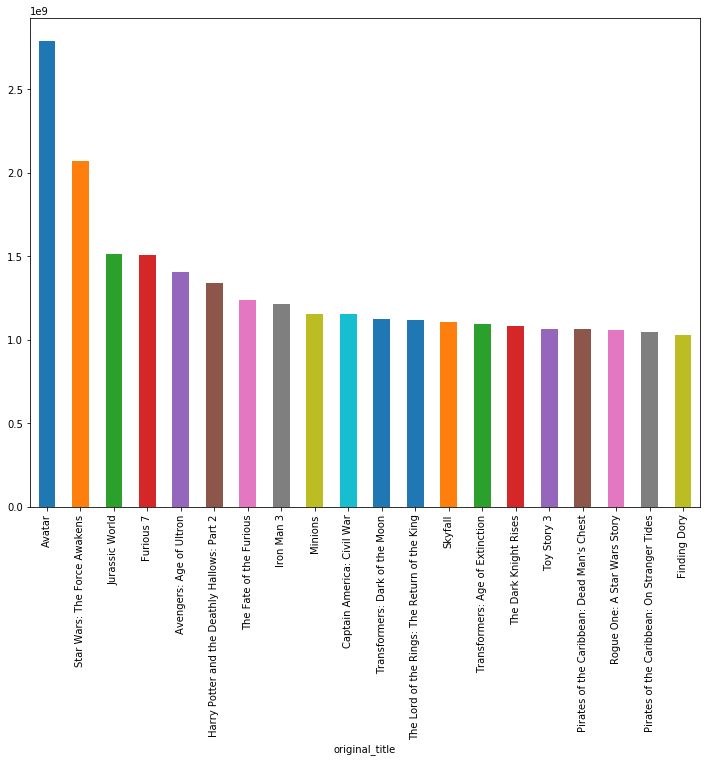

In [15]:
data_selection= movies1.loc[movies1['original_title'] !=0,['original_title', 'revenue']]
data_sel=data_selection.groupby('original_title')['revenue'].mean().sort_values(ascending=False).head(20)
data_sel.plot.bar()
data_sel.dtypes

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

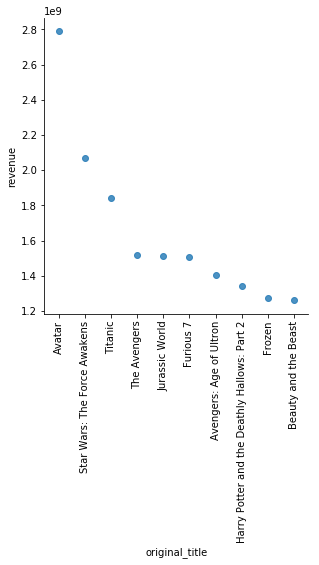

In [16]:
data_selection= movies1.sort_values('revenue', ascending=False).head(10)
sns.lmplot('original_title', 'revenue', data= data_selection, fit_reg=False)
plt.xticks(rotation=90)

** Now let's see how the franchise movies are performing in the box office. Of course the majority of block busters are milking the same cow again and again, as the trend shows, but how big is exactly the market? **

franchise_name
Harry Potter Collection                7707367425
Star Wars Collection                   7434494790
James Bond Collection                  7106970239
The Fast and the Furious Collection    5125098793
Pirates of the Caribbean Collection    4521576826
Transformers Collection                4366101244
Despicable Me Collection               3691070216
The Twilight Collection                3342107290
Ice Age Collection                     3216708553
Jurassic Park Collection               3031484143
Shrek Collection                       2955807008
The Hunger Games Collection            2944162634
The Hobbit Collection                  2935523356
The Avengers Collection                2924961604
The Lord of the Rings Collection       2916544743
X-Men Collection                       2808832317
Avatar Collection                      2787965087
Mission: Impossible Collection         2778977995
Spider-Man Collection                  2496346518
The Dark Knight Collection         

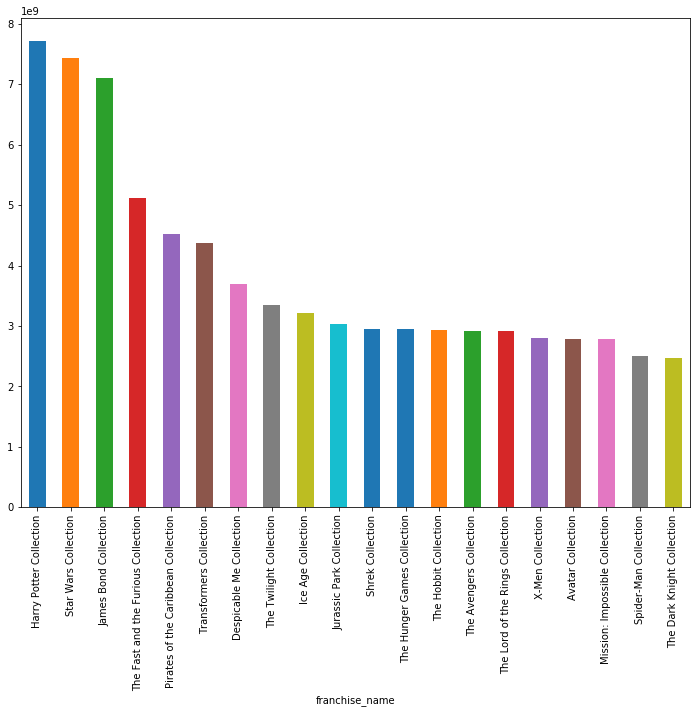

In [17]:
franchise_rev = movies.loc[movies['franchise_name'] !=0, ['franchise_name', 'revenue']]
franchise_rev_clean = franchise_rev.groupby('franchise_name')['revenue'].sum().sort_values(ascending=False)
rev_top20=franchise_rev_clean.head(20)
rev_top20.plot.bar()
rev_top20

**As we can see the franchise movies are leading the billions club comfortably. We will have to evaluate to see how the expense is compared against the income **

**Now let's see the budger for the franchise movies **

franchise_name
James Bond Collection                      1539650000
Harry Potter Collection                    1280000000
Pirates of the Caribbean Collection        1250000000
The Fast and the Furious Collection        1009000000
X-Men Collection                            983000000
Transformers Collection                     965000000
Star Wars Collection                        854350000
The Hobbit Collection                       750000000
The Terminator Collection                   661400000
Mission: Impossible Collection              650000000
Spider-Man Collection                       597000000
The Dark Knight Collection                  585000000
Captain America Collection                  560000000
The Chronicles of Narnia Collection         560000000
Iron Man Collection                         540000000
Shrek Collection                            535000000
Star Trek: Alternate Reality Collection     525000000
Madagascar Collection                       502000000
The Avengers 

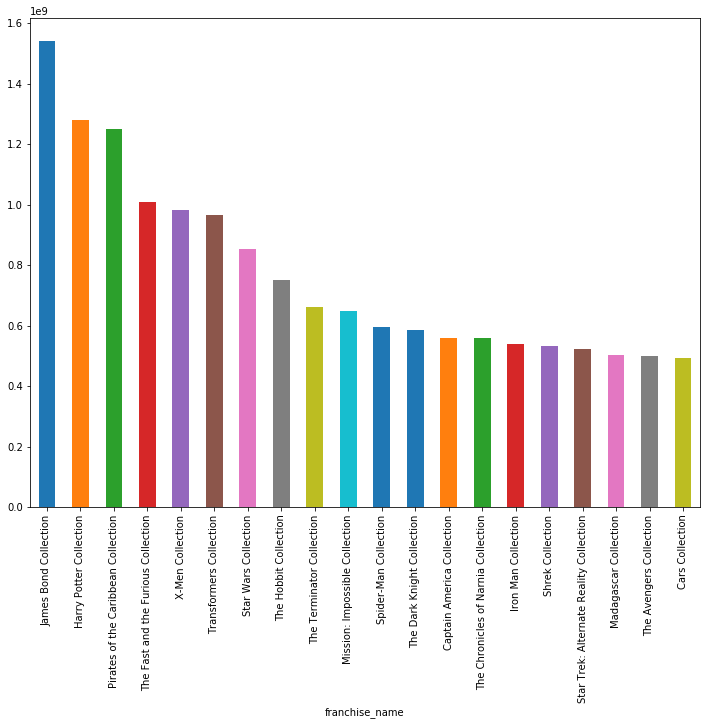

In [18]:
franchise_bud = movies.loc[movies['franchise_name'] !=0, ['franchise_name', 'budget']]
franchise_bud_clean = franchise_bud.groupby('franchise_name')['budget'].sum().sort_values(ascending=False)
budget_top20=franchise_bud_clean.head(20)
budget_top20.plot.bar()
budget_top20

**Let's find the comparison between the budget spent by franchise on the movies and the revenue collected. Let's plot a bar chart side by side **

,revenue,budget
franchise_name,,
Harry Potter Collection,7707367425,1280000000
Star Wars Collection,7434494790,854350000
James Bond Collection,7106970239,1539650000
The Fast and the Furious Collection,5125098793,1009000000
Pirates of the Caribbean Collection,4521576826,1250000000
Transformers Collection,4366101244,965000000
Despicable Me Collection,3691070216,299000000
The Twilight Collection,3342107290,385000000
Ice Age Collection,3216708553,429000000


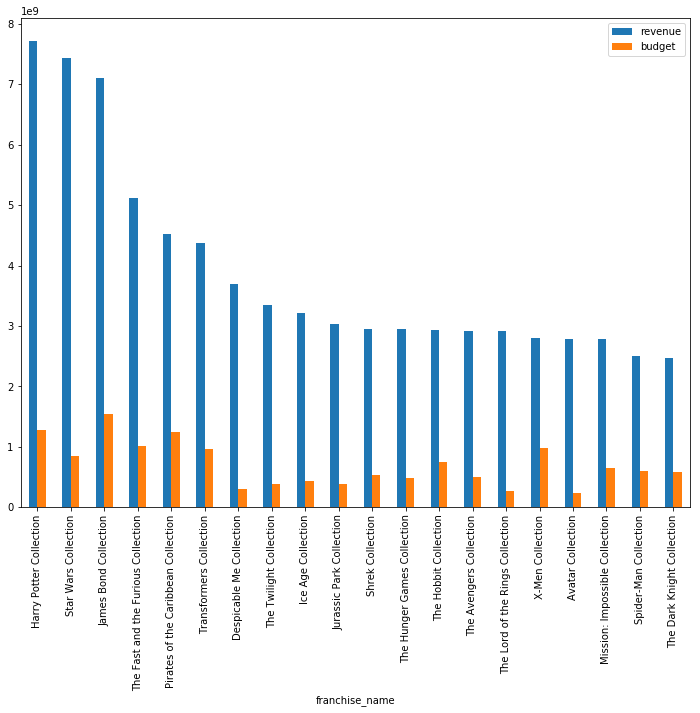

In [19]:
movies_stack= movies.loc[movies['franchise_name'] !=0, ['franchise_name', 'budget','revenue']]
movies_stack_clean=movies_stack.groupby(['franchise_name']).agg({ 'revenue':'sum','budget':'sum',}).sort_values(by='revenue',ascending=False).head(20)
movies_stack_clean.plot.bar()
movies_stack_clean

**Now let's find which production company makes the money! In this analysis we will look into which production comapny is making the most revenue. **

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

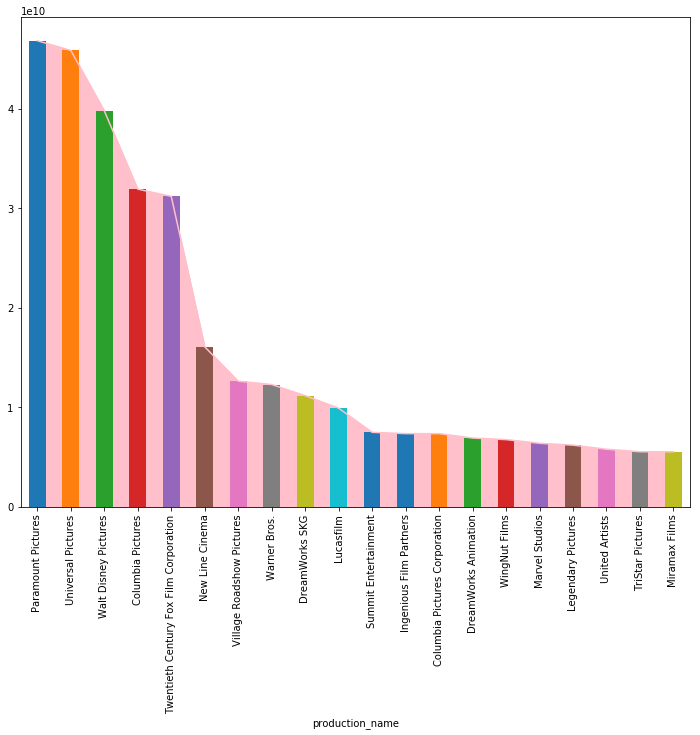

In [20]:
production_rev = movies.loc[movies['production_name'] !=0, ['production_name', 'revenue']]
production_rev_clean = production_rev.groupby('production_name')['revenue'].sum().sort_values(ascending=False)
prod_top20=production_rev_clean.head(20)
prod_top20.plot.bar()
prod_top20.plot.area(color='pink')
prod_top20
plt.xticks(rotation=90)

**Now lets do a pie-chart analysis of the top 20 production companies to fin the market shares**

Text(0.5,0.98,'Revenue Generate by Production companies')

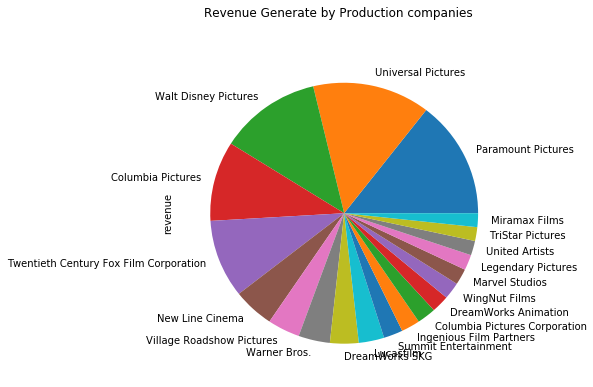

In [21]:
production_rev = movies.loc[movies['production_name'] !=0, ['production_name', 'revenue']]
production_rev_clean = production_rev.groupby('production_name')['revenue'].sum().sort_values(ascending=False)
prod_top20=production_rev_clean.head(20)
prod_top20.plot.pie(figsize=(6,6))
plt.suptitle('Revenue Generate by Production companies')

**Evaluating the best rated movies which has more than 1000 votes**

In [22]:
movie_vote=movies.loc[movies['vote_count'] >1000, ['original_title', 'vote_average']]
movie_vote_clean = movie_vote.groupby('original_title')['vote_average'].mean().sort_values(ascending=False)
movie_vote_top20=movie_vote_clean.head(20)
movie_vote_top20

original_title
君の名は。                              8.5
The Shawshank Redemption           8.5
The Godfather                      8.5
The Dark Knight                    8.3
Once Upon a Time in America        8.3
La vita è bella                    8.3
Pulp Fiction                       8.3
Schindler's List                   8.3
Psycho                             8.3
Whiplash                           8.3
The Godfather: Part II             8.3
One Flew Over the Cuckoo's Nest    8.3
千と千尋の神隠し                           8.3
Fight Club                         8.3
GoodFellas                         8.2
Forrest Gump                       8.2
Cidade de Deus                     8.2
The Empire Strikes Back            8.2
American History X                 8.2
Rear Window                        8.2
Name: vote_average, dtype: float64

**Now lets find out what's the budget and revenue of the best movies according to the list**

,vote_average,budget,revenue
original_title,,,
The Godfather,8.5,6000000,2.450664e+08
君の名は。,8.5,0,3.552983e+08
The Shawshank Redemption,8.5,25000000,2.834147e+07
One Flew Over the Cuckoo's Nest,8.3,3000000,1.089813e+08
The Dark Knight,8.3,185000000,1.004558e+09
La vita è bella,8.3,20000000,2.294000e+08
Whiplash,8.3,3300000,1.309200e+07
Schindler's List,8.3,22000000,3.213656e+08
Pulp Fiction,8.3,8000000,2.139288e+08


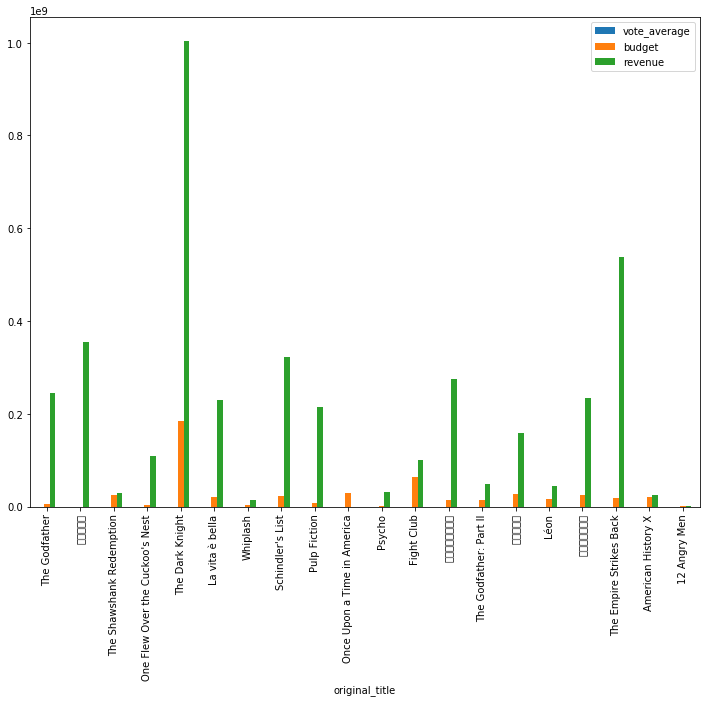

In [23]:
best_movie=movies.loc[movies['vote_count'] >1000, ['original_title', 'vote_average','revenue', 'budget']]
best_moview_clean = best_movie.groupby('original_title').agg({ 'vote_average' :'mean','budget':'mean','revenue':'mean',}).sort_values(by='vote_average',ascending=False).head(20)
best_moview_clean.plot.bar()
best_moview_clean

**As we can see in the above bar graph, best movies are not the blockbusters, but the return is pretty high. Some movies like Leon, American History X have very less margin. **

**Lets analyze the highest grossing movie revenue chart with the average vote**

In [24]:
hit_movies= movies.loc[movies['original_title']!=0, ['original_title','revenue','vote_average']]
hit_movies_clean=hit_movies.groupby(['original_title']).agg({ 'revenue':'sum','vote_average':'mean',}).sort_values(by='revenue',ascending=False).head(20)
hit_movies_clean

,revenue,vote_average
original_title,,
Avatar,2787965087,7.200000
Star Wars: The Force Awakens,2068223624,7.500000
Titanic,1849939188,6.666667
Beauty and the Beast,1640236890,5.180000
Alice in Wonderland,1597491110,6.212500
The Avengers,1568143326,5.900000
Jurassic World,1513528810,6.500000
Furious 7,1506249360,7.300000
Avengers: Age of Ultron,1405403694,7.300000


**We are looking into the bottom end of the voting charts. All movies with more than 1000 votes with lowest vote in the series and the revenue and bidget for them. It's interseting to see that these movies are not just some B grade movies but some heavy banners. **

,vote_average,budget,revenue
original_title,,,
The Boy Next Door,4.10,4000000,52425855.0
Batman & Robin,4.20,125000000,238207122.0
Ghost Rider: Spirit of Vengeance,4.70,57000000,149217355.0
The Last Airbender,4.70,150000000,318502923.0
Rings,4.80,25000000,83080890.0
Independence Day: Resurgence,4.90,165000000,389681935.0
Ouija,4.90,5000000,103590271.0
Fantastic Four,4.95,110000000,249278657.5
Spring Breakers,5.00,5000000,31724284.0


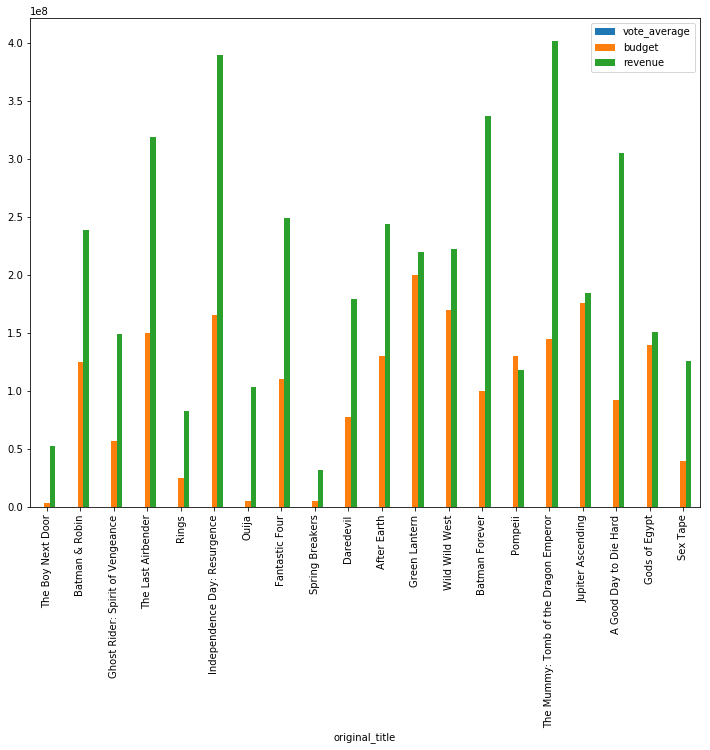

In [25]:
movie_vote_low=movies.loc[movies['vote_count'] >1000, ['original_title', 'vote_average','revenue', 'budget']]
movie_vote_low_clean = movie_vote_low.groupby('original_title').agg({ 'vote_average' :'mean','budget':'mean','revenue':'mean',}).sort_values(by='vote_average',ascending=True).head(20)
movie_vote_bottom20=movie_vote_low_clean.head(20)
movie_vote_bottom20.plot.bar()
movie_vote_bottom20